In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Manipulation**

In [45]:
data_text = pd.Series(['Swift', 'C++', 'Golang', 'Python', 'Java'],
                  index=list('SCGPJ'),
                  name='text_series')

data = pd.Series([11, 7, 5, 3, 9, 1], 
                 name='num_series')

In [46]:
print(f'.name  : {data_text.name}')
print(f'.index : {data_text.index}')
print(f'.values: {data_text.values}')

.name  : text_series
.index : Index(['S', 'C', 'G', 'P', 'J'], dtype='object')
.values: ['Swift' 'C++' 'Golang' 'Python' 'Java']


#### **Insert - Drop elements**

In [47]:
data[2.5] = 19
data

0.0    11
1.0     7
2.0     5
3.0     3
4.0     9
5.0     1
2.5    19
Name: num_series, dtype: int64

In [48]:
data.drop([2, 4])

0.0    11
1.0     7
3.0     3
5.0     1
2.5    19
Name: num_series, dtype: int64

#### **Locating**

In [49]:
data[[1, 2]]

1.0    7
2.0    5
Name: num_series, dtype: int64

In [50]:
data.loc[2:4]

2.0    5
3.0    3
4.0    9
Name: num_series, dtype: int64

In [51]:
data.iloc[2:4]

2.0    5
3.0    3
Name: num_series, dtype: int64

In [52]:
data[data.between(4, 6)]

2.0    5
Name: num_series, dtype: int64

#### **Functions**

In [53]:
print(f'.min()   : {data.min()}')
print(f'.max()   : {data.max()}')
print(f'.sum()   : {data.sum()}')
print(f'.std()   : {data.std()}')
print(f'.var()   : {data.var()}')
print(f'.mean()  : {data.mean()}')
print(f'.idxmax(): {data.idxmax()}')
print(f'.argmax(): {data.argmax()}')

.min()   : 1
.max()   : 19
.sum()   : 55
.std()   : 5.9841059323447645
.var()   : 35.8095238095238
.mean()  : 7.857142857142857
.idxmax(): 2.5
.argmax(): 6


In [54]:
print(f".str.count():\n{data_text.str.count('a')}\n")
print(f".str.upper():\n{data_text.str.upper()}\n")
print(f".replace()  :\n{data_text.replace('Java', 'C#')}")

.str.count():
S    0
C    0
G    1
P    0
J    2
Name: text_series, dtype: int64

.str.upper():
S     SWIFT
C       C++
G    GOLANG
P    PYTHON
J      JAVA
Name: text_series, dtype: object

.replace()  :
S     Swift
C       C++
G    Golang
P    Python
J        C#
Name: text_series, dtype: object


#### **Others**

In [55]:
data_text['K'] = 'Kotlin'
data_text.sort_index(inplace=True)
data_text

C       C++
G    Golang
J      Java
K    Kotlin
P    Python
S     Swift
Name: text_series, dtype: object

In [56]:
series_1 = pd.Series([1, 2, 3, 4, 5], index=list('ABCDE'))
series_2 = pd.Series([5, 4, 3, 2, 1], index=list('ABCDE'))
series_3 = pd.Series([0, 1, 0, 1], index=list('ABDE'))

print(series_1 + series_2, '\n')
print(series_1 + series_3)

A    6
B    6
C    6
D    6
E    6
dtype: int64 

A    1.0
B    3.0
C    NaN
D    4.0
E    6.0
dtype: float64


In [57]:
data = pd.Series([2, 15, 22, 55], 
                 index=[['A', 'A', 'B', 'B'], [1, 2, 1, 2]])
groupby_firstIdx  = data.groupby(level=0).sum()
groupby_secondIdx = data.groupby(level=1).mean()
groupby_condition = data.groupby((data % 2 == 0)).max()

print(groupby_firstIdx, '\n')
print(groupby_secondIdx, '\n')
print(groupby_condition)

A    17
B    77
dtype: int64 

1    12.0
2    35.0
dtype: float64 

False    55
True     22
dtype: int64


## **Interpolation**

- **Nearest Neighbor Interpolation**: Lấy giá trị của neighbor gần vị trí khuyết nhất.
- **Linear Interpolation**: Áp dụng phương trình đường thẳng giữa hai điểm đã biết và suy ra các giá trị của các điểm thuộc đường đó.

In [58]:
data = pd.Series([1, 6, 3, 8, np.nan, 7, np.nan, 2])

In [59]:
print(data.dropna(), '\n')
print(data.fillna(1.0), '\n')

0    1.0
1    6.0
2    3.0
3    8.0
5    7.0
7    2.0
dtype: float64 

0    1.0
1    6.0
2    3.0
3    8.0
4    1.0
5    7.0
6    1.0
7    2.0
dtype: float64 



In [60]:
# Should use this to prevent misunderstanding in data
print(data.interpolate()) 

0    1.0
1    6.0
2    3.0
3    8.0
4    7.5
5    7.0
6    4.5
7    2.0
dtype: float64


## **Case Studies: How to use historical data? - Temperature Forecasting**

**Moving Averages in Time Series**
- In time series analysis, moving averages are commonly used to smooth out fluctuations in data and help identify trends. 
- There are two main types of moving averages: **Simple Moving Average (SMA)** and **Exponential Moving Average (EMA)**.
- The key difference between EMA and SMA is that EMA places more weight on recent observations, making it more sensitive to short-term changes in data.

**Simple Moving Average (SMA)**

$$
\text{SMA}_t = \frac{1}{N} \sum_{i=0}^{N-1} x_{t-i}
$$

- The Simple Moving Average is the unweighted mean of the previous $N$ data points.
- Where:
    - $N$ is the number of periods,
    - $x_t$ is the data point at time $t$,
    - $\text{SMA}_t$ is the Simple Moving Average at time $t$.

**Exponential Moving Average (EMA)**

$$
\text{EMA}_t = \alpha \cdot x_t + (1 - \alpha) \cdot \text{EMA}_{t-1}
$$

- The Exponential Moving Average gives more weight to recent data points, making it more responsive to new information.
- Where:
    - $\alpha$ is the smoothing factor, usually calculated as $\alpha = \frac{2}{N+1}$,
    - $x_t$ is the data point at time $t$,
    - $\text{EMA}_t$ is the Exponential Moving Average at time $t$,
    - $\text{EMA}_{t-1}$ is the EMA at time $t-1$.

In [61]:
data = pd.read_csv('data/1-weather-history.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature (C)  59538 non-null  float64
dtypes: float64(1)
memory usage: 547.0 KB


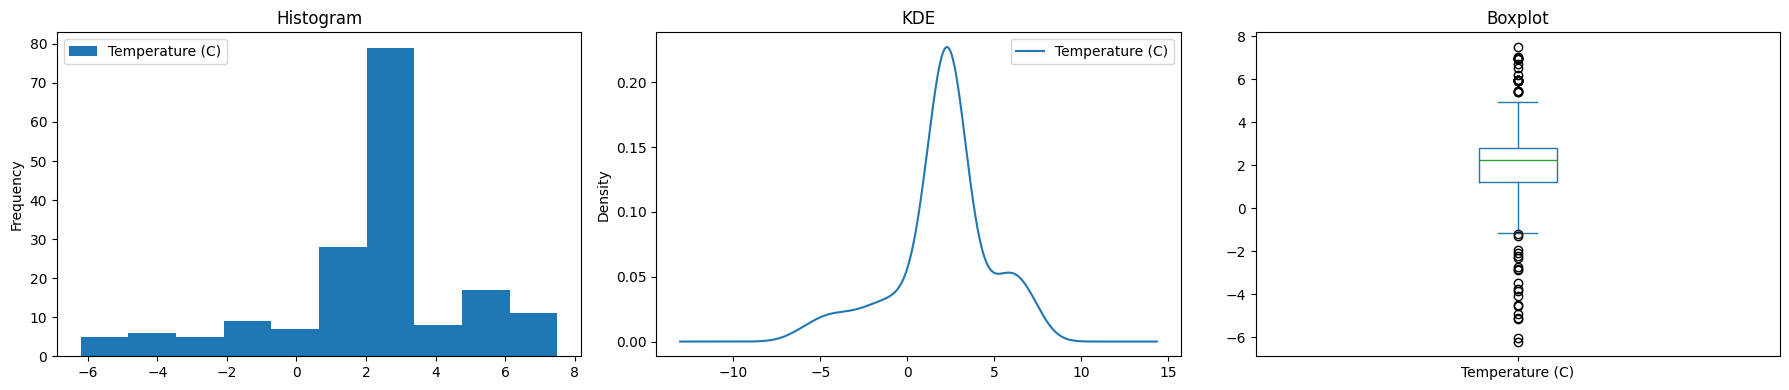

In [62]:
orginal_data = data[:200]

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

orginal_data.plot.hist(ax=axes[0])
orginal_data.plot.kde(ax=axes[1])
orginal_data.plot.box(ax=axes[2])

axes[0].set_title('Histogram')
axes[1].set_title('KDE')
axes[2].set_title('Boxplot')

plt.tight_layout()
plt.show()

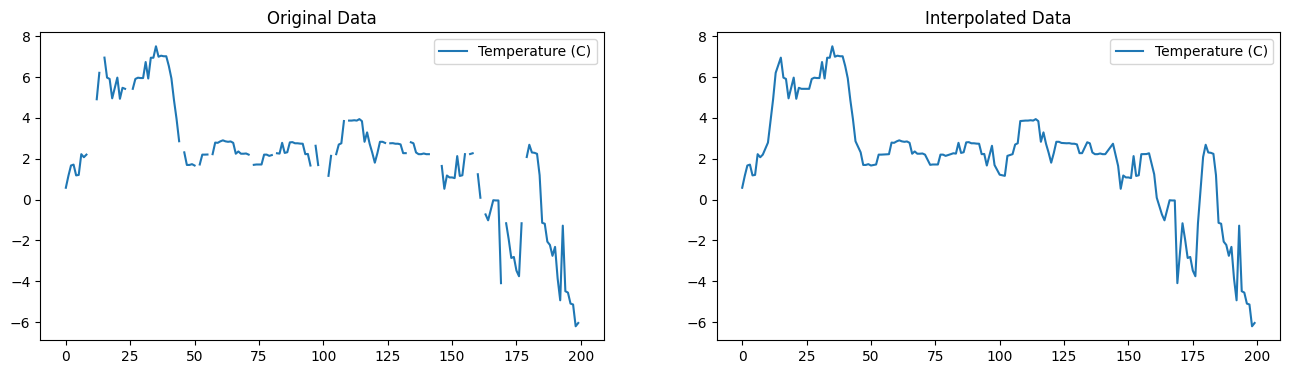

In [63]:
interp_data = orginal_data.interpolate()

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for ax, d, title in zip(axes, 
                        [orginal_data, interp_data], 
                        ['Original Data', 'Interpolated Data']):
    d.plot(ax=ax)
    ax.set_title(title)

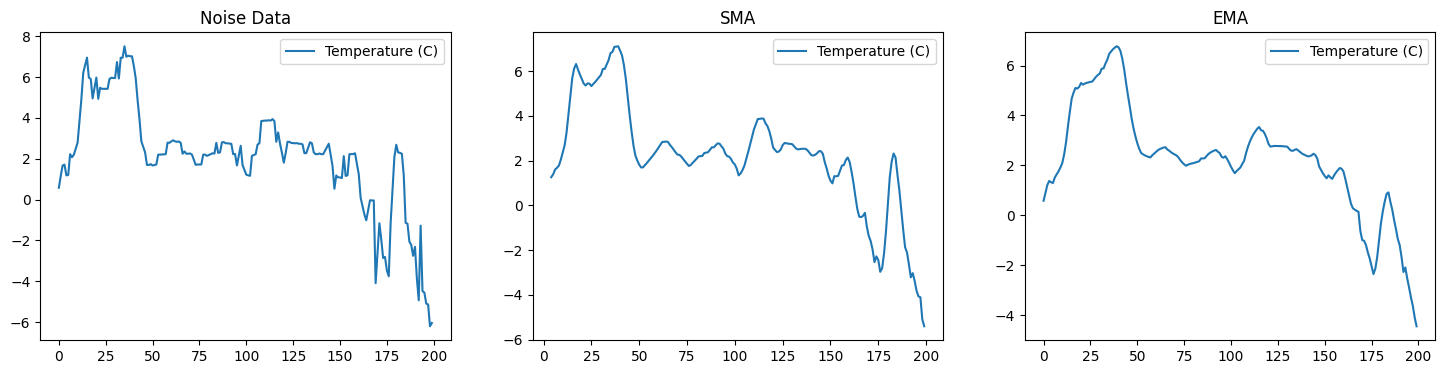

In [64]:
noise_data = interp_data
sma_data   = interp_data.rolling(window=5).mean()
ema_data   = interp_data.ewm(span=10).mean() # Set the value of parameter `adjust` based on current problem

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ax, d, title in zip(axes, 
                        [noise_data, sma_data, ema_data], 
                        ['Noise Data', 'SMA', 'EMA']):
    d.plot(ax=ax)
    ax.set_title(title)